<a href="https://colab.research.google.com/github/marcinwolter/classifierTests/blob/master/BDTtesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.datasets import make_blobs
 


n_samples = 10000  # number of generated events
n_features = 4     # number of dimensions

# Generate 2 blobs with 2 classes where the second blob contains
# half positive samples and half negative samples. Probability in this
# blob is therefore 0.5.
vec = np.zeros(n_features)
vec[0] = 2
vec[1] = 2
centers = [-vec, vec]
X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=n_features, shuffle=False, cluster_std=4.0,
                  random_state=42)

y[:n_samples // 2] = 0
y[n_samples // 2:] = 1

print(X.shape)

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, shuffle=True)




 
# Create and fit a classifier
#clf = DecisionTreeClassifier(max_depth=10)
#clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=6000)
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),learning_rate=0.01, n_estimators=200)
#clf = BaggingClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=100)

#clf = GaussianNB()
#clf = AdaBoostClassifier(learning_rate=2.5,base_estimator=GaussianNB(),n_estimators=8,algorithm='SAMME.R')
#clf = BaggingClassifier(GaussianNB(),max_samples=0.0009,n_estimators=500)

#clf = KNeighborsClassifier(n_neighbors=1)
#clf = BaggingClassifier(KNeighborsClassifier(n_neighbors=1),n_estimators=500)

#clf = LinearDiscriminantAnalysis()
#clf = BaggingClassifier(LinearDiscriminantAnalysis(),max_samples=0.0015,n_estimators=2000)

#clf = GradientBoostingClassifier(learning_rate=0.1,n_estimators=200)
#clf = RandomForestClassifier(n_estimators=200)

# Takes extremaly long time
#clf = GaussianProcessClassifier(1.0 * RBF(1.0))
#clf = BaggingClassifier(GaussianProcessClassifier(1.0 * RBF(1.0)))

clf.fit(X_train, y_train)


(10000, 4)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=4,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

(119214, 2)
(119214,)
(119214, 4)
Plotting the test points
Plotting  1  datapoints.
Plotting  1  datapoints.


Text(0.5, 1.0, 'Decision Boundary')

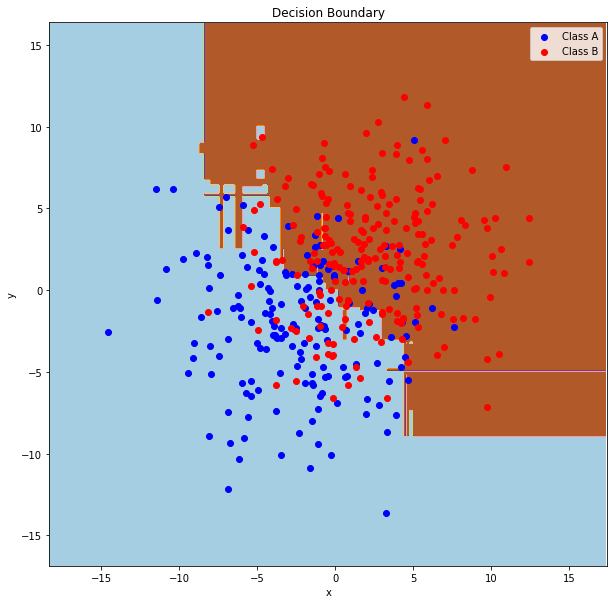

In [29]:
plot_colors = "br"
plot_step = 0.1
class_names = "AB"
 
plt.figure(figsize=(10, 10))
 
# Plot the decision boundaries
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

print(np.c_[xx.ravel(), yy.ravel()].shape)
print(xx.ravel().shape)

XX = np.c_[xx.ravel(), yy.ravel()]

for k in range(2,n_features):
   b = np.zeros(XX.shape[0], dtype = float).reshape(XX.shape[0],1)
   #print(b.shape)
   XX = np.hstack([XX, b])

print(XX.shape)

Z = clf.predict(XX)
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")
 
# Plot the test points
print("Plotting the test points")
for i, n, c in zip(range(2), class_names, plot_colors):
    # plot first 400 test data points
    N = min(400,len(y_test))
    idx = np.where(y_test[0:N] == i)
    print("Plotting ",len(idx)," datapoints.")
    plt.scatter(X_test[idx, 0], X_test[idx, 1],
                c=c, cmap=plt.cm.Paired,
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

Text(0.7, 0.5, 'AUC = 0.83')

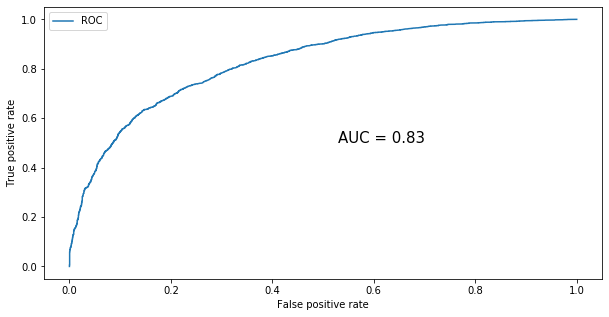

In [30]:
        # plot the roc curve
        figure = plt.figure(figsize=(10, 5))
        ZZ = clf.predict_proba(X_test)[:, 1]
        #print(y_test.shape,"   ",Z.shape)
        fpr, tpr, _ = roc_curve(y_test, ZZ)
        plt.plot(fpr, tpr, label="ROC")
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        #plt.title('ROC curve')
        plt.legend(loc='best')
        auc = roc_auc_score(y_test, ZZ)
        plt.text(0.7, 0.5, ('AUC = %.2f' % auc),
                size=15, horizontalalignment='right')